**Nashyll Naidoo**

#DATASET AND PROBLEM DEFINITION

In [3]:
# All the libraries used for the project
#Libraries needed for reading the data
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#Libraries needed for performing Logistic Regression on the dataset
from sklearn import linear_model, preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

#Libraries needed for building a Artificial Neural Network Classifier
import keras
from keras.models import Model, Sequential
from keras.layers import Dense, Activation
import keras.backend as K
from keras import optimizers
import seaborn as sns


#Pre-processing data => loading the data and cleaning

In [4]:
#Department information
department_df = pd.read_csv('https://raw.githubusercontent.com/nashyll/LinearRegression/main/Department_Information.csv')
department_df

,Department_ID,Department_Name,DOE
0,IDEPT4670,Aerospace Engineering,1961-05-31T00:00:00Z
1,IDEPT5528,Biosciences and Bioengineering,1943-06-28T00:00:00Z
2,IDEPT3115,Chemical Engineering,1940-05-01T00:00:00Z
3,IDEPT5881,Chemistry,2013-06-08T00:00:00Z
4,IDEPT4938,Civil Engineering,1941-10-27T00:00:00Z
5,IDEPT1423,Computer Science & Engineering,1941-05-03T00:00:00Z
6,IDEPT4132,Earth Sciences,1982-08-19T00:00:00Z
7,IDEPT2054,Electrical Engineering,1985-05-27T00:00:00Z
8,IDEPT2357,Energy Science and Engineering,2007-03-28T00:00:00Z
9,IDEPT1537,Humanities & Social Science,1953-09-14T00:00:00Z


In [5]:
#Load the data from the github link
student_admission_df = pd.read_csv('https://raw.githubusercontent.com/nashyll/LinearRegression/main/student_admission_data.csv')
student_admission_df

,Student_ID,DOA,DOB,Department_Choices,Department_Admission,Parents Education Level
0,SID20131143,7/1/2013,2/5/1996,IDEPT7783,IDEPT7783,1
1,SID20131151,7/1/2013,7/31/1995,IDEPT6347,IDEPT6347,1
2,SID20131171,7/1/2013,9/5/1995,IDEPT1836,IDEPT1836,2
3,SID20131176,7/1/2013,1/12/1996,IDEPT8473,IDEPT8473,1
4,SID20131177,7/1/2013,7/30/1995,IDEPT5528,IDEPT5528,2
...,...,...,...,...,...,...
3995,SID20189921,7/1/2018,4/27/2001,IDEPT7005,IDEPT7005,2
3996,SID20189926,7/1/2018,12/10/2000,IDEPT1836,IDEPT1836,2
3997,SID20189949,7/1/2018,4/15/2001,IDEPT4938,IDEPT4938,2
3998,SID20189982,7/1/2018,11/26/2000,IDEPT6347,IDEPT6347,2


In [6]:
#Load the data from the github link
student_performance_df = pd.read_csv('https://raw.githubusercontent.com/nashyll/LinearRegression/main/Student_Performance_Data%20(1).csv')
student_performance_df

,Student_ID,Semster_Name,Paper_ID,Paper_Name,Marks
0,SID20131143,Sem_1,SEMI0012995,Paper 1,44
1,SID20131143,Sem_1,SEMI0015183,Paper 2,74
2,SID20131143,Sem_1,SEMI0018371,Paper 3,80
3,SID20131143,Sem_1,SEMI0015910,Paper 4,44
4,SID20131143,Sem_1,SEMI0016208,Paper 5,95
...,...,...,...,...,...
209606,SID20189989,Sem_8,SEMI0082598,Paper 3,94
209607,SID20189989,Sem_8,SEMI0088030,Paper 4,49
209608,SID20189989,Sem_8,SEMI0081794,Paper 5,47
209609,SID20189989,Sem_8,SEMI0086600,Paper 6,87


#Find how many courses each student failed which will help us determine if they spent another semester in their course

In [7]:
student_Id_frame = student_performance_df.groupby('Student_ID')
len(student_Id_frame)

3819

In [8]:
student_failed_courses = {}
for x in student_Id_frame:
  student_id = x[0]
  count_failed_course =0
  #print(x[0])
  #print(x[1])
  student_marks_data_frame = x[1]
  for m in student_marks_data_frame['Marks']:
    if(m<40):
      count_failed_course=count_failed_course+1
      #print(count_failed_course)
  student_failed_courses[student_id]=count_failed_course

student_failed_courses

{'SID20131143': 1,
 'SID20131151': 0,
 'SID20131171': 2,
 'SID20131176': 0,
 'SID20131177': 1,
 'SID20131184': 1,
 'SID20131189': 0,
 'SID20131191': 1,
 'SID20131208': 0,
 'SID20131220': 1,
 'SID20131231': 0,
 'SID20131244': 0,
 'SID20131246': 1,
 'SID20131265': 0,
 'SID20131278': 3,
 'SID20131303': 1,
 'SID20131314': 0,
 'SID20131331': 0,
 'SID20131364': 1,
 'SID20131384': 0,
 'SID20131407': 0,
 'SID20131420': 0,
 'SID20131433': 1,
 'SID20131438': 0,
 'SID20131443': 0,
 'SID20131446': 0,
 'SID20131477': 0,
 'SID20131501': 0,
 'SID20131506': 0,
 'SID20131526': 2,
 'SID20131529': 1,
 'SID20131535': 0,
 'SID20131582': 1,
 'SID20131603': 0,
 'SID20131618': 0,
 'SID20131649': 1,
 'SID20131675': 0,
 'SID20131703': 2,
 'SID20131753': 0,
 'SID20131754': 1,
 'SID20131764': 0,
 'SID20131767': 0,
 'SID20131800': 0,
 'SID20131804': 0,
 'SID20131811': 0,
 'SID20131817': 0,
 'SID20131823': 1,
 'SID20131826': 1,
 'SID20131830': 0,
 'SID20131834': 2,
 'SID20131850': 0,
 'SID20131851': 1,
 'SID2013186

In [9]:
number_of_students_who_failed=0
studentSpentAnotherYear = {}
for x in student_failed_courses:
  if student_failed_courses[x]>=1:
    studentSpentAnotherYear[x] =1
    number_of_students_who_failed +=1
  else:
    studentSpentAnotherYear[x] =0
number_of_students_who_failed

1630

In [10]:
print(len(student_admission_df))
print(len(student_failed_courses))

4000
3819


##Combine the data with admission data to check how parents tertiary education affects the student in completing on time.


In [11]:

studentIDs =[]
sAy = []
for x in studentSpentAnotherYear:
  studentIDs.append(x)
  sAy.append(studentSpentAnotherYear[x])
data = {'Student_ID':studentIDs,'SpentAnotherYear':sAy}
SpentAnotherYear_df = pd.DataFrame(data)  
SpentAnotherYear_df

,Student_ID,SpentAnotherYear
0,SID20131143,1
1,SID20131151,0
2,SID20131171,1
3,SID20131176,0
4,SID20131177,1
...,...,...
3814,SID20189921,0
3815,SID20189926,1
3816,SID20189949,1
3817,SID20189982,0


In [12]:
student_admission_df

,Student_ID,DOA,DOB,Department_Choices,Department_Admission,Parents Education Level
0,SID20131143,7/1/2013,2/5/1996,IDEPT7783,IDEPT7783,1
1,SID20131151,7/1/2013,7/31/1995,IDEPT6347,IDEPT6347,1
2,SID20131171,7/1/2013,9/5/1995,IDEPT1836,IDEPT1836,2
3,SID20131176,7/1/2013,1/12/1996,IDEPT8473,IDEPT8473,1
4,SID20131177,7/1/2013,7/30/1995,IDEPT5528,IDEPT5528,2
...,...,...,...,...,...,...
3995,SID20189921,7/1/2018,4/27/2001,IDEPT7005,IDEPT7005,2
3996,SID20189926,7/1/2018,12/10/2000,IDEPT1836,IDEPT1836,2
3997,SID20189949,7/1/2018,4/15/2001,IDEPT4938,IDEPT4938,2
3998,SID20189982,7/1/2018,11/26/2000,IDEPT6347,IDEPT6347,2


In [24]:
student_admission_df.columns = ['Student_ID', 'DOA', 'DOB', 'Department_Choices', 'Department_Admission', 'Parents_Education_Level']

dataCombinedDF=pd.merge(SpentAnotherYear_df,student_admission_df,on='Student_ID')
dataCombinedDF

,Student_ID,SpentAnotherYear,DOA,DOB,Department_Choices,Department_Admission,Parents_Education_Level
0,SID20131143,1,7/1/2013,2/5/1996,IDEPT7783,IDEPT7783,1
1,SID20131151,0,7/1/2013,7/31/1995,IDEPT6347,IDEPT6347,1
2,SID20131171,1,7/1/2013,9/5/1995,IDEPT1836,IDEPT1836,2
3,SID20131176,0,7/1/2013,1/12/1996,IDEPT8473,IDEPT8473,1
4,SID20131177,1,7/1/2013,7/30/1995,IDEPT5528,IDEPT5528,2
...,...,...,...,...,...,...,...
3995,SID20189921,0,7/1/2018,4/27/2001,IDEPT7005,IDEPT7005,2
3996,SID20189926,1,7/1/2018,12/10/2000,IDEPT1836,IDEPT1836,2
3997,SID20189949,1,7/1/2018,4/15/2001,IDEPT4938,IDEPT4938,2
3998,SID20189982,0,7/1/2018,11/26/2000,IDEPT6347,IDEPT6347,2


#Graphs for each variable

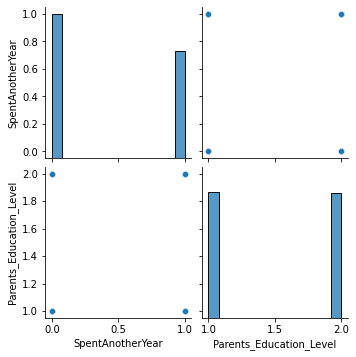

In [25]:
#pair plot is used to compare between two variables at a time
sns.pairplot(dataCombinedDF)

In [35]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

dataCombinedDF. rename(columns = {'SpentAnotherYear':'output'}, inplace = True)
dataCombinedDF

model = ols("output ~ Student_ID + Parents_Education_Level", data=dataCombinedDF).fit()
model_summary = model.summary()
print(model_summary)


                            OLS Regression Results                            
Dep. Variable:                 output   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.322e+25
Date:                Wed, 17 Aug 2022   Prob (F-statistic):               0.00
Time:                        17:12:15   Log-Likelihood:             1.2078e+05
No. Observations:                4000   AIC:                        -2.339e+05
Df Residuals:                     180   BIC:                        -2.099e+05
Df Model:                        3819                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

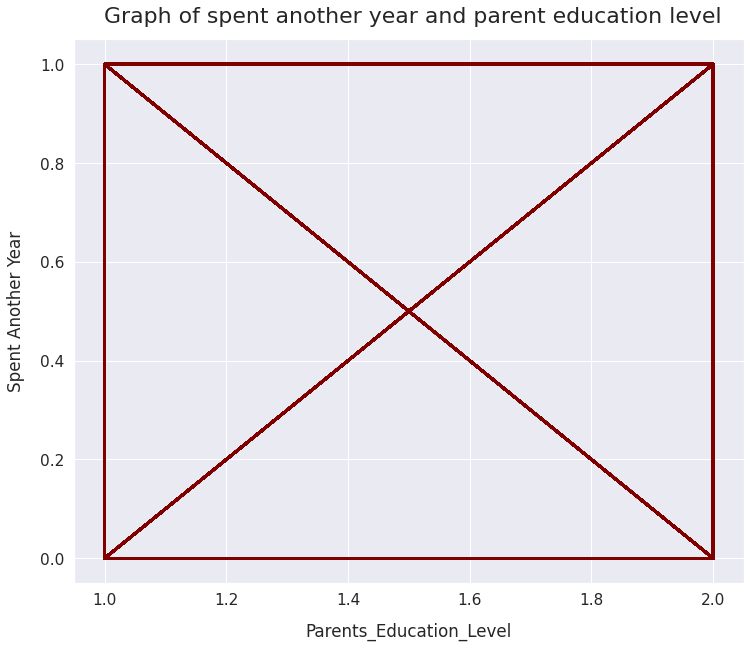

In [32]:
sns.set(font_scale=1.4)
dataCombinedDF.set_index('Parents_Education_Level')['output'].plot(figsize=(12, 10), linewidth=2.5, color='maroon')
plt.xlabel("Parents_Education_Level", labelpad=15)
plt.ylabel("Spent Another Year", labelpad=15)
plt.title(" Graph of spent another year and parent education level", y=1.02, fontsize=22);